# Analyzing Traffic and Pedestrian Stops by Law Enforcement in Rhode Island (2005-2015)

Jessica Lee and Neha Deshpande

DSCI 235: Project Final Report

GitHub Repository Link: https://github.com/jihyunlee1007/DSCI235_Project_Final_Report

Note: We worked on this project at the library together every week. It is hard to distinguish who did what part exactly but we worked on it equally.


# Introduction

In the United States, each day law enforcement officers conduct more than 50,000 traffic stops. This dataset encompasses all of the intricacies that go into gathering and analyzing millions of traffic stops conducted nationwide. This specific dataset from a study conducted at Stanford focuses on traffic stops done in Rhode Island, covering all of 2005 to 2015. The purpose of this dataset is to help researchers and policymakers understand the interactions between police officers and the public. By doing so we can improve the interactions between law enforcement and the public. Diving into the dataset, there are 13 different variables that can help us understand these traffic stops more thoroughly. These include: stop date, stop time, age (year born), age, race, violation (raw), violation (cleaned), search condition, stop outcome, arrested, stop duration, and drug related stop. We can use this dataset to answer assumptions that are often made about police-driver interactions. We can also use the dataset to see what kind of groups are often pulled over and why. By studying these patterns we can make more informed decisions in the justice system.

# Our Hypothesis/Claims

We believe to find that people of color (POC) are more prone to being stopped by law enforcement due to the nature of their groups being opressed in society. We also believe that men have a higher chance of being stopped regardless of race since they tend to be more aggressive on the road. We also expect to see more younger people in this dataset since younger drivers are more common on the road and have less driving experience making them more reckless.

First let's load in the dataset from the Stanford Open Policing Project: Traffic and Pedestrian Stops by Law Enforcement in Rhode Island (2005-2015) study.

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/jihyunlee1007/DSCI235_Project_Final_Report/main/police_project.csv')
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Race vs Stops by Law Enforcement

We want to analyze what the correlation between race and being stopped by law enforcement is. This is a relative topic which has been brought to light in recent years since 2020.

To add context to the problem at hand, let's look at the spread of the race percentage in Rhode Island in 2010. We chose to look at the population in 2010 since it is between 2005 and 2015. According to the US Census, Rhode Island's population in 2010 was 81% white, 5.7% Black, 2.9% Asian, and 12.4% hispanic. We didn't calculate the category for other races from the US Census since it was hard to distinguish what specific races were used as "other" in the Stanford dataset.

In [ ]:
race_counts = df['driver_race'].value_counts()
total_stops = len(df)
race_percentage = (race_counts / total_stops)
print(race_percentage)

driver_race
White       0.677538
Black       0.133463
Hispanic    0.103629
Asian       0.024624
Other       0.002616
Name: count, dtype: float64


We can see that Stanford's dataset is 67% white, 13% black, 10% hispanic, 2% asian, and 0.2% other. Now let's visualize the difference between the US Census Rhode Island race population percentages to the percetages we obtained from this dataset.

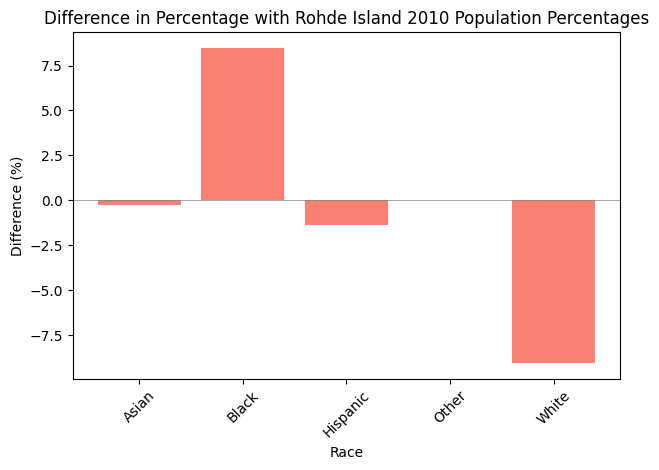

In [50]:
import matplotlib.pyplot as plt

race_percentage = df['driver_race'].value_counts(normalize=True) * 100
reference_percentages = {'White': 81.0, 'Black': 5.7, 'Asian': 2.9, 'Hispanic': 12.4}
difference = race_percentage - pd.Series(reference_percentages)

plt.bar(difference.index, difference.values, color='salmon')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Difference in Percentage with Rohde Island 2010 Population Percentages')
plt.xlabel('Race')
plt.ylabel('Difference (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As seen above, we can see that the only race that had a positive percentage difference between true populations and percentage of race stopped, was Black people. This makes sense because in the US we know that historically Black people are one of the most opressed groups in terms of their relationship with law enforcement.

# Relationship Between if a Search was Conducted and Race

Based on our analysis above, we want to continue to see if there is a bias between law enforcement and certain races. By looking at the data for search conducted we can see if certain races were forced by law enforcement to conduct a search. Although, there may be a valid reason why law enforcement conducted searches regardless of race, there is reason to believe that people of color were forced to conduct a search more than than a white person for no reason. This could be due to the bias that law enforcmenet has for people of color, considering them more "suspicious."



In [ ]:
search_by_race = pd.crosstab(df['driver_race'], df['search_conducted'])

search_percentage = search_by_race.apply(lambda x: x / x.sum() * 100, axis=1)

print(search_by_race)
print(search_percentage)

search_conducted  False  True 
driver_race                   
Asian              2208     51
Black             11454    790
Hispanic           8923    584
Other               237      3
White             60390   1768
search_conducted      False     True 
driver_race                          
Asian             97.742364  2.257636
Black             93.547860  6.452140
Hispanic          93.857158  6.142842
Other             98.750000  1.250000
White             97.155636  2.844364


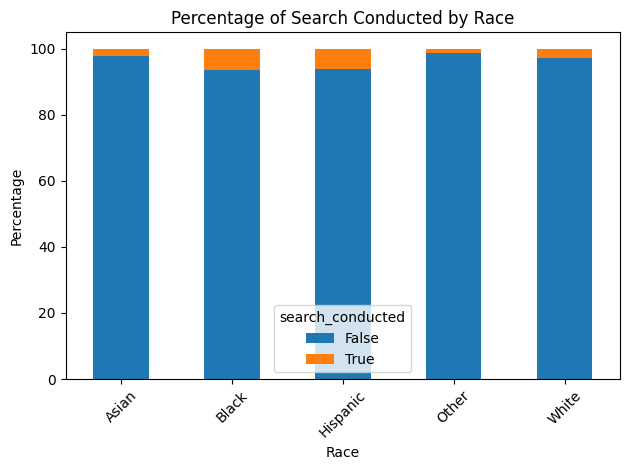

In [ ]:
search_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage of Search Conducted by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see from the bar plot above, for all races, 90% and above of people who were stopped by law enforcement were not conducted a search. This tells us that law enforcement in Rhode Island may be more cautious and stricter on regulations since they stop people who are not deemed as doing something suspicious. On the other hand, we can see that the highest proportion of search conducted within each race was black, hispanic, white, asian, and in last was other.

# Correlation Between Race, Gender, and Stops by Law Enforcement

Now we want to add in the factor of gender into our previous data analysis. We will now analyze the correlation between race, gender, and stops by law enforcement to see if being a woman or a man has any affect on the results we got from earlier.

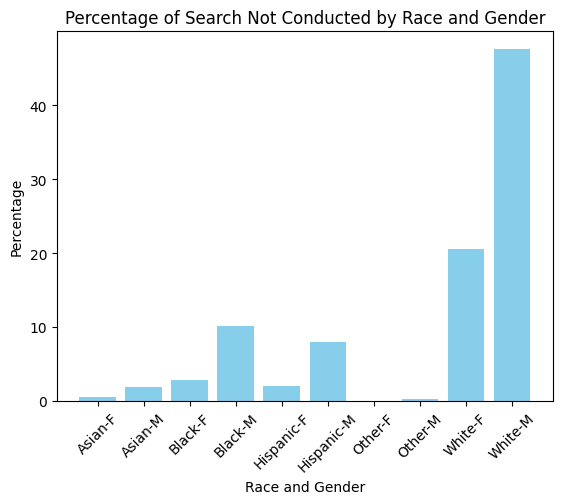

In [49]:
search_not_conducted = df[df['search_conducted'] == False]

search_not_conducted_by_race_gender = search_not_conducted.groupby(['driver_race', 'driver_gender']).size().reset_index(name='count')
search_not_conducted_by_race_gender['driver_race_gender'] = search_not_conducted_by_race_gender['driver_race'] + '-' + search_not_conducted_by_race_gender['driver_gender']
search_not_conducted_by_race_gender['percentage'] = (search_not_conducted_by_race_gender['count'] / len(search_not_conducted)) * 100

plt.bar(search_not_conducted_by_race_gender['driver_race_gender'], search_not_conducted_by_race_gender['percentage'], color='skyblue')
plt.title('Percentage of Search Not Conducted by Race and Gender')
plt.xlabel('Race and Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

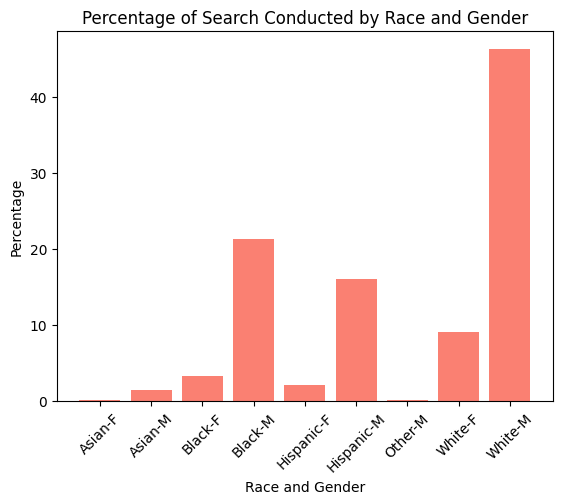

In [47]:
search_conducted = df[df['search_conducted'] == True]

search_conducted_by_race_gender = search_conducted.groupby(['driver_race', 'driver_gender']).size().reset_index(name='count')
search_conducted_by_race_gender['driver_race_gender'] = search_conducted_by_race_gender['driver_race'] + '-' + search_conducted_by_race_gender['driver_gender']
search_conducted_by_race_gender['percentage'] = (search_conducted_by_race_gender['count'] / len(search_conducted)) * 100

plt.bar(search_conducted_by_race_gender['driver_race_gender'], search_conducted_by_race_gender['percentage'], color='salmon')
plt.title('Percentage of Search Conducted by Race and Gender')
plt.xlabel('Race and Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In our graphs, you can see that generally males were stopped much more than females. This is due to the fact that there are a lot more males in the dataset than females. According to CNN from a study done by University of Westminster's school of Architecture and Cities, claimed that "male car and van drivers were twice as dangerous to others as women per kilometer driven."


# Most Common Traffic Violation

Now we want to see the most to least popular violation from this dataset.

In [ ]:
most_common_violations = df['violation'].value_counts().reset_index(name='count')
most_common_violations['percentage'] = (most_common_violations['count'] / len(df)) * 100

print(most_common_violations.head())

             violation  count  percentage
0             Speeding  48463   52.825890
1     Moving violation  16224   17.684569
2            Equipment  11020   12.012077
3                Other   4317    4.705639
4  Registration/plates   3432    3.740966


As we see above, speeding violations were the most common. This is because it is the easiest to catch someone speeding compared to other violations. It is also common for law enforcement to be on the lookout for speeders the most compared to other types of violations.

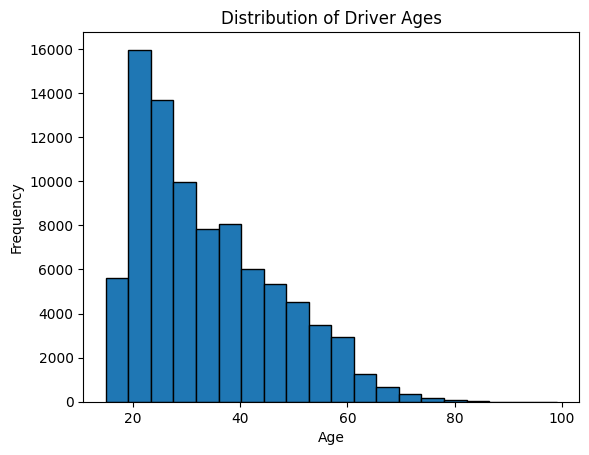

In [48]:
plt.hist(df['driver_age'], bins=20, edgecolor='black')
plt.title('Distribution of Driver Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the age distribution plot obtained from this dataset, we can see that the data is mostly concentrated around early 20's and early 30's. This makes sense since older people in their 60's or above are likely not driving around as much. We also know that younger people tend to drive more reckless because they have less experience driving which makes them more prone to being stopped by law enforcement. Younger people may also be not as organized and tidy when it comes to car maintance like broken headlights or signals and registration.

# Conclusion

From our data analysis on the Stanford dataset we have discovered that compared to Rhode Island's race population percentage, black people were the only race to have a positive difference between the proportion that were pulled over from this dataset and their true population. Then we explored the relationship between race and gender based on whether or not a search was conducted. 90% and above of those who were stopped by law enforcement were not searched for all race groups, however, black had the mose searches conducted. Then we ploted bar graphs for each subcategory of race and gender for those who were not searched. Likewise, we also plotted for each subcategory of race and gender for those who were searched. We found that from both plots, the proportions of males for each race exceeded the proportions of females. We also found that the most common traffic violation from this dataset turned out to be a speeding violation. Lastly, we looked into the age factor of this dataset and found that the data distribution was mostly concentrated around early 20's to early 30's. All of the results that we found through data analysis further proved our claims before we dove into the dataset.

# Works Cited

- https://openpolicing.stanford.edu/data/

- https://www2.census.gov/geo/maps/dc10_thematic/2010_Profile/2010_Profile_Map_Rhode_Island.pdf

- https://www.cnn.com/2020/04/06/world/male-female-road-danger-study-scli-intl-wellness-gbr/index.html
